<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [25]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"D:\HSLU_Projects\course_setting\Data\bereinigte_DATEN_ano_csv.csv")
df.head()

,Unnamed: 0,V1,athlete,gender,run,location,date,TurnNr,MinimalRadius,VelocityAtMinRadius,...,azitonextnext,HORIZONTALGATEDISTANCE,VERTICALGATEDISTANCE,regularbs1orfs2,steepness_A,filter_$,goofy2_regular1,@2Ferse_3Zehe_4Ferse,Zehen1_Fersen2,DistanzSchätz
0,0,35,3,1,1,Zermatt,200915,2,10.63,53.6,...,341.45477,8.515579,20.414966,1,2,0,1,2,2,30.635388
1,1,36,3,1,2,Zermatt,200915,2,11.05,52.3,...,341.45477,8.515579,20.414966,1,2,0,1,2,2,30.635388
2,2,37,3,1,3,Zermatt,200915,2,10.99,52.8,...,341.45477,8.515579,20.414966,1,2,0,1,2,2,30.635388
3,3,38,3,1,4,Zermatt,200915,2,11.41,52.2,...,341.45477,8.515579,20.414966,1,2,0,1,2,2,30.635388
4,4,39,5,1,1,Zermatt,200915,2,11.31,49.7,...,341.45477,8.515579,20.414966,1,2,0,2,3,1,30.635388


In [3]:
df_clean = df.drop(["Unnamed: 0", "date", "location", "Unnamed0", "vectortonext",
                    "vector2Dtonext", "vectortonextnorm", "vector2Dtonextnorm",
                    "projpttonext", "vectortonextnext", "vector2Dtonextnext",
                    "vectortonextnextnorm", "vector2Dtonextnextnorm",'filter_$', 'goofy2_regular1',
       '@2Ferse_3Zehe_4Ferse', 'Zehen1_Fersen2', 'DistanzSchätz'], axis=1)

In [4]:
df_clean.columns

Index(['V1', 'athlete', 'gender', 'run', 'TurnNr', 'MinimalRadius',
       'VelocityAtMinRadius', 'VelocityAtTurnEntry', 'VelocityAtTurnExit',
       'TimeStarttoEnd', 'TimeStartToMinRad', 'TimeMinRadToEnd',
       'GlideTime_endtostart', 'TimeStarttoEnd_2', 'Initiation', 'Completion',
       'Gliding', 'GATEDISTANCE', 'dist2Dtonext', 'STEEPNESS', 'azitonext',
       'slopechangetonext', 'angletonext', 'projtonext', 'offsettonext',
       'dist3Dtonextnext', 'dts2Dtonextnext', 'slopetonextnext',
       'azitonextnext', 'HORIZONTALGATEDISTANCE', 'VERTICALGATEDISTANCE',
       'regularbs1orfs2', 'steepness_A'],
      dtype='object')

In [5]:
X = df_clean.drop(['athlete', 'gender', 'run', 'TurnNr','TimeStarttoEnd', 'TimeStarttoEnd_2',
                  'TimeStartToMinRad', 'TimeMinRadToEnd', 'GlideTime_endtostart',
                   'regularbs1orfs2'], axis = 1)
Y = df_clean['TimeStarttoEnd']
X_featurenames = X.columns

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1313)

In [28]:
scaler = StandardScaler()
model = BaggingRegressor( random_state = 0, n_estimators = 10000, verbose = 1,
                              n_jobs = -1)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
model.fit(X_train, Y_train)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


<AxesSubplot:>

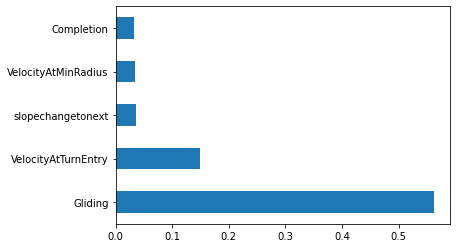

In [19]:
feat_importances = pd.Series(model.feature_importances_, index = X_featurenames)
feat_importances.nlargest(5).plot(kind = 'barh')

In [23]:
import shap

explainer = shap.KernelExplainer(model = model, data = X_test)

Provided model function fails when applied to the provided data set.


TypeError: 'DecisionTreeRegressor' object is not callable

In [ ]:
ex = shap.TreeExplainer(model)
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)